# Playing with Filter Parameters of Convolutional Neural Network (CNN) Using the IMDb Dataset

In this notebook, I will experiment the effects of some the parameters of CNN by changing their values and observing the change in accuracy. I will tune the following parameters.
1. Number of filters
2. Filter size
3. Epochs
4. Padding mode
5. Strides

I will use Keras (http://keras.io) with Theano as the backend run the system in a NVIDIA gpu server.

I am using the example codes from Keras examples.
https://github.com/fchollet/keras/blob/master/examples/imdb_cnn.py

In [165]:
# Start by importing required packages

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
sns.set_style("ticks")
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

### We will keep the vocabulary size of the dataset to 5000. 
So we are setting max_features to 5000 and downloading the imdb review data. The dataset will contain sequences of numbers where each number is a placeholder for a word.

In [38]:
max_features = 5000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


### Lets have a look at a sample data instance
We can see that it contains a sequence of numbers.

In [42]:
print(x_train[4])

[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 14, 20, 56, 33, 2401, 18, 457, 88, 13, 2626, 1400, 45, 3171, 13, 70, 79, 49, 706, 919, 13, 16, 355, 340, 355, 1696, 96, 143, 4, 22, 32, 289, 7, 61, 369, 71, 2359, 5, 13, 16, 131, 2073, 249, 114, 249, 229, 249, 20, 13, 28, 126, 110, 13, 473, 8, 569, 61, 419, 56, 429, 6, 1513, 18, 35, 534, 95, 474, 570, 5, 25, 124, 138, 88, 12, 421, 1543, 52, 725, 2, 61, 419, 11, 13, 1571, 15, 1543, 20, 11, 4, 2, 5, 296, 12, 3524, 5, 15, 421, 128, 74, 233, 334, 207, 126, 224, 12, 562, 298, 2167, 1272, 7, 2601, 5, 516, 988, 43, 8, 79, 120, 15, 595, 13, 784, 25, 3171, 18, 165, 170, 143, 19, 14, 5, 2, 6, 226, 251, 7, 61, 113]


### Lets check the lengths of the sequences in the training data

In [49]:
# Gather the lengths
sequence_lengths = [len(sequence) for sequence in x_train]
print( 'Length of the longest sequence : ', max(sequence_lengths) )
print( 'Length of the shortest sequence : ', min(sequence_lengths) )
print( 'Average Length : ', np.mean(sequence_lengths) )
print( 'Standard Deviation of Lengths : ', np.std(sequence_lengths) )

Length of the longest sequence :  2494
Length of the shortest sequence :  11
Average Length :  238.71364
Standard Deviation of Lengths :  176.493673649


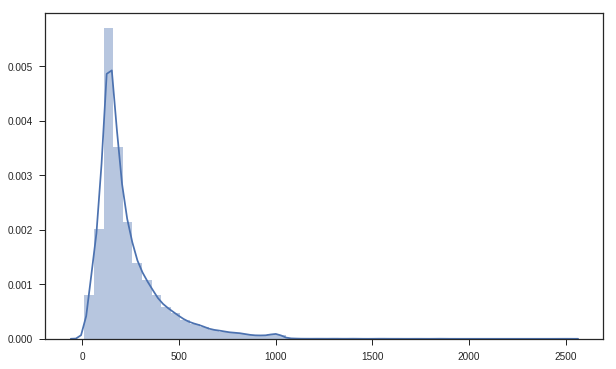

In [65]:
# Plot the distribution
sns.distplot(sequence_lengths)

### At this point we will pad the sequences so that each sequence can have only 400 elements (words). 
We can see that the sequence length distribution is skewed. This is necessary to make all sequences equal in length. Longer sequences will be trimmed down to 400 and shorter sequences will be padded with zero.

In [66]:
maxlen = 400

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


### Create a function that will build and return a model with the given parameters

In [22]:
def create_model(n_filters, n_kernel_size, n_padding, n_strides):
    model = Sequential()
    model.add(Embedding(max_features, 
                        embedding_dims, 
                        input_length=maxlen))
    model.add(Dropout(0.2))
    model.add(Conv1D(n_filters,
                     n_kernel_size,
                     padding=n_padding,
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(hidden_dims))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### We are defining some default parameters

In [68]:
# set parameters:
batch_size = 32
embedding_dims = 50
kernel_size = 3
hidden_dims = 250
epochs = 2
filter_size = 3
paddings = ['valid', 'causual', 'same']

### First experiment will look at the Number of filters.
We will try from small to large values

In [156]:
n_filters = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

In [157]:
# To save accuracy and loss values
histories = []

In [158]:
for i in range( len(n_filters) ):
    print('Number of Filter : ', n_filters[i])
    
    model = create_model(n_filters=n_filters[i], n_kernel_size=3, n_padding='valid', n_strides=1)
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 0,
              validation_data=(x_test, y_test))
    histories.append(history)


Number of Filter :  50
Number of Filter :  100
Number of Filter :  150
Number of Filter :  200
Number of Filter :  250
Number of Filter :  300
Number of Filter :  350
Number of Filter :  400
Number of Filter :  450
Number of Filter :  500
Number of Filter :  550
Number of Filter :  600
Number of Filter :  650
Number of Filter :  700
Number of Filter :  750
Number of Filter :  800
Number of Filter :  850
Number of Filter :  900
Number of Filter :  950
Number of Filter :  1000


### Lets plot the accuracy values during training and testing folds for diffierent filter sizes

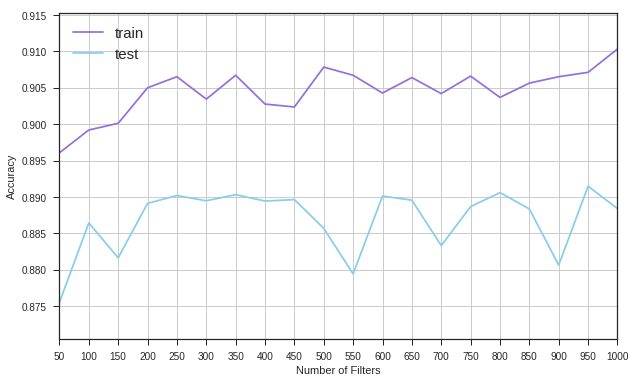

In [171]:
train_accuracies = [h.history['acc'][1] for h in histories]
test_accuracies = [h.history['val_acc'][1] for h in histories]
train_losses = [h.history['loss'][1] for h in histories]
test_losses = [h.history['val_loss'][1] for h in histories]
plt.figure()
plt.plot(n_filters, train_accuracies, c='mediumpurple', label='train')
plt.plot(n_filters, test_accuracies, c='skyblue', label='test')
plt.xlim(50,1000)
plt.xticks(n_filters)
plt.ylim(min(test_accuracies)-0.005, max(train_accuracies)+0.005)
plt.legend(loc='upper left', prop={'size':15})
plt.xlabel('Number of Filters')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

### Now lets observe the effect of filter sizes with 950 filters as we got the highest accuracy with 950 filters.

In [172]:
# We will test these numbers
filter_sizes = [1,2,3,4,5,6,7,8,9,10]
# To save accuracy and loss values
histories = []

# Build and test models with different filter sizes
for i in range( len(filter_sizes) ):
    print('Filter size : ', filter_sizes[i])
    
    model = create_model(n_filters=950, n_kernel_size=filter_sizes[i], n_padding='valid', n_strides=1)
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 0,
              validation_data=(x_test, y_test))
    histories.append(history)



Filter size :  1
Filter size :  2
Filter size :  3
Filter size :  4
Filter size :  5
Filter size :  6
Filter size :  7
Filter size :  8
Filter size :  9
Filter size :  10


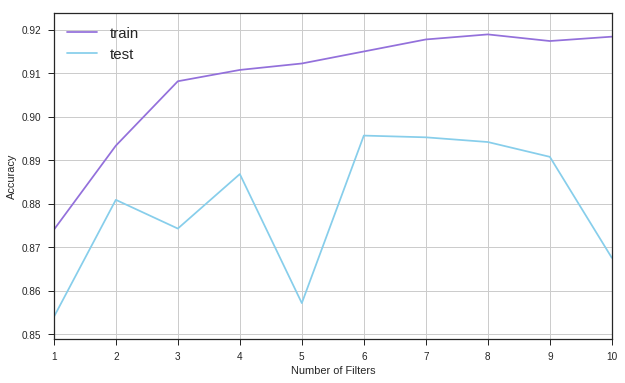

In [175]:
train_accuracies = [h.history['acc'][1] for h in histories]
test_accuracies = [h.history['val_acc'][1] for h in histories]
train_losses = [h.history['loss'][1] for h in histories]
test_losses = [h.history['val_loss'][1] for h in histories]
plt.figure()
plt.plot(filter_sizes, train_accuracies, c='mediumpurple', label='train')
plt.plot(filter_sizes, test_accuracies, c='skyblue', label='test')
plt.xlim(1,10)
plt.xticks(filter_sizes)
plt.ylim(min(test_accuracies)-0.005, max(train_accuracies)+0.005)
plt.legend(loc='upper left', prop={'size':15})
plt.xlabel('Number of Filters')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

### Lets build a model with 950 filters where filter size is 6. Run this model upto 10 epochs.
We just saw that filter with size 6 gave the best accuracy. Then it started to decrease.

In [176]:
model = create_model(n_filters=950, n_kernel_size=6, n_padding='valid', n_strides=1)
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              verbose = 0,
              validation_data=(x_test, y_test))

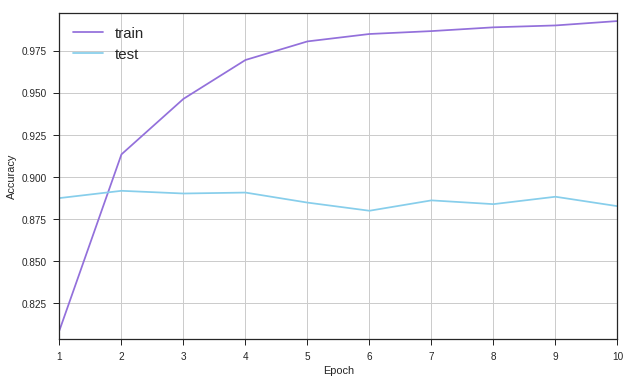

In [181]:
train_accuracies = history.history['acc']
test_accuracies = history.history['val_acc']
plt.figure()
plt.plot(filter_sizes, train_accuracies, c='mediumpurple', label='train')
plt.plot(filter_sizes, test_accuracies, c='skyblue', label='test')
plt.xlim(1,10)
plt.xticks(filter_sizes)
plt.ylim(min(train_accuracies)-0.005, max(train_accuracies)+0.005)
plt.legend(loc='upper left', prop={'size':15})
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## Observations
#### 1. Number of Filters
The performance was almost stable from 200 to 450 filters. Then we observe some frequent ups and downs in performance.
#### 2. Filter Size
We can see some ups and downs in the performance when we play with the filter size. We got the best performance using filter size 6. With increasing the size, performance started to drop.
#### 3. Epochs
As expected, with the increment of epochs, training set performance is increased and the model got overfitted. We can see the reflection by watching the decrease in accuracy for the test set.

### Although we can see some large ups and downs in the performance from the plot, they are not that large if we think globally. In the Y axis we have set a very small range. Thats why the spikes are looking bigger.
